## Задание из задачника № 11.9.3 (а)
#### Выполнил студент группы Б03-903
#### Деревянкин Иван

<img src="11_9_3_а.png">

-----------

Подключаем библиотеки

In [21]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

Вводим список постоянных значений, который указан в учебничке

In [22]:
x0 = 0
xT = 1
y0 = 0
yT = 2

Из этих значений вычисляем шаг сетки h. N и eps подбираем методом проб и ошибок

In [23]:
N = 10000
h = (xT - x0) / N
eps = 1e-4
# v = y'

Определим удобные функцочки, чтобы не писать эту поебень по сто раз

In [24]:
def f(x, y):
    return sqrt(y) * x

Функция значений f при заданых параметрах:

In [43]:
def sm(alpha, points: bool = False):
    xn = x0
    yn = y0
    vn = alpha
    yn_array = [yn]

    def iterate(xn, yn, vn):
        ynext = yn + h * vn
        k1 = f(xn, yn)
        k2 = f(xn + h, yn + h * k1)
        vnext = vn + (h / 2) * (k1 + k2)
        return ynext, vnext

    while xn < xT:
        yn, vn = iterate(xn, yn, vn)
        xn += h
        if points:
            yn_array.append(yn)
    if points:
        return yn_array
    return yn

In [44]:
alpha_0 = 2
alpha_1 = 1
alpha = (alpha_0 + alpha_1)/2


while abs(sm(alpha) - yT) > eps:
    if sm(alpha) - yT > 0:
        alpha_0 = alpha
    else:
        alpha_1 = alpha
    alpha = (alpha_0 + alpha_1) / 2

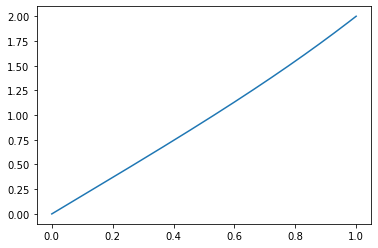

In [45]:
yn_points = sm(alpha, points=True)
plt.plot(np.linspace(0, 1, len(yn_points)), yn_points)
plt.show()